# [Soy Bean Desease (Small) Dataset](https://archive.ics.uci.edu/dataset/91/soybean+small)

A small subset of Michalski's famous soybean disease database

### Estrutura do dataset

| Alvo  | Valores |
| ------------- | ------------- |
|class| {D1, D2, D3, D4, }| 

| Features  | Valores |
| ------------- | ------------- |
|date| {4, 5, 3, 6, 0, 2, 1, }| 
|plant-stand| {0, 1, }| 
|precip| {2, 0, 1, }| 
|temp| {1, 2, 0, }| 
|hail| {1, 0, }| 
|crop-hist| {1, 3, 2, 0, }| 
|area-damaged| {0, 1, 2, 3, }| 
|severity| {1, 2, }| 
|seed-tmt| {0, 1, }| 
|germination| {2, 1, 0, }| 
|plant-growth| {1, }| 
|leaves| {1, 0, }| 
|leafspots-halo| {0, }| 
|leafspots-marg| {2, }| 
|leafspot-size| {2, }| 
|leaf-shread| {0, }| 
|leaf-malf| {0, }| 
|leaf-mild| {0, }| 
|stem| {1, }| 
|lodging| {0, 1, }| 
|stem-cankers| {3, 0, 1, 2, }| 
|canker-lesion| {1, 0, 3, 2, }| 
|fruiting-bodies| {1, 0, }| 
|external-decay| {1, 0, }| 
|mycelium| {0, 1, }| 
|int-discolor| {0, 2, }| 
|sclerotia| {0, 1, }| 
|fruit-pods| {0, 3, }| 
|fruit-spots| {4, }| 
|seed| {0, }| 
|mold-growth| {0, }| 
|seed-discolor| {0, }| 
|seed-size| {0, }| 
|shriveling| {0, }| 
|roots| {0, 1, }| 

### Instalação das dependências

In [62]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten, Dense

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

from ucimlrepo import fetch_ucirepo 
pd.options.mode.copy_on_write = True

### Importando o dataset

In [63]:
# fetch dataset 
dataset = fetch_ucirepo(id=91) 
  
# data (as pandas dataframes) 
X = dataset.data.features 
Y = dataset.data.targets 

# Transform labels to int
labels = Y["class"].unique()
for i in range(len(labels)):
  Y.loc[Y['class']==labels[i], 'class'] = i


### One-hot Encoding das features

In [64]:
cat_fatures = []
for feature in dataset.data.features:
    #print(feature)
    feature_info = dataset.variables.loc[dataset.variables["name"] == feature]
    if feature_info.type.values[0] == "Categorical":
        cat_fatures.append(feature)


In [65]:
X = pd.get_dummies(X,columns=cat_fatures, dtype=int)

### Dividindo os conjuntos de teste e treino

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size= 0.3, random_state = 28)
y_true = list(y_test['class'])

### Wisard

In [67]:
from wisard import Wisard

wisard = Wisard(num_classes=len(labels),n=6)

### Treinamento

In [68]:
wisard.train(x_train,y_train)

### Teste

In [69]:
predictions = wisard.classify(x_test)
# print(predictions)

In [70]:
acc = round(accuracy_score(y_true, predictions) * 100, 2)
print(f'Acurácia obtida: {acc:.2f}%')

prec = round(precision_score(y_true, predictions, average="macro", zero_division=np.nan) * 100, 2)
print(f'Precisão obtida: {prec:.2f}%')

recall = round(recall_score(y_true, predictions, average="macro") * 100, 2)
print(f'Recall obtido: {recall:.2f}%')

f1 = round(f1_score(y_true, predictions, average="macro") * 100, 2)
print(f'F1 Score obtida: {f1:.2f}%')


Acurácia obtida: 80.00%
Precisão obtida: 80.36%
Recall obtido: 85.00%
F1 Score obtida: 76.79%


### Comparação com o MLP(Primeiro Trabalho)

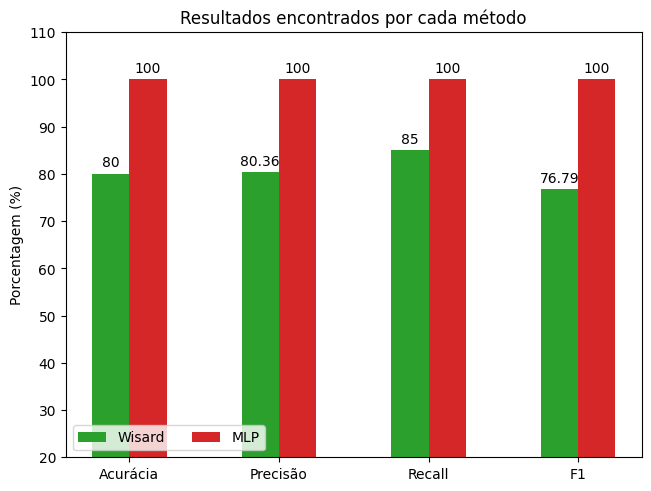

In [74]:

import matplotlib.pyplot as plt
import numpy as np

measurements = ("Acurácia", "Precisão", "Recall", "F1")
methods = {
    'Wisard': (acc, prec, recall, f1),
    'MLP': (100, 100, 100, 100), # Resultados obtidos em: https://github.com/GabrielaPC/MultiLayerPerceptron 
}

x = np.arange(len(measurements))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in methods.items():
    if attribute == 'Wisard':
        color = "tab:green"
    else:
        color = "tab:red"

    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=color)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Porcentagem (%)')
ax.set_title('Resultados encontrados por cada método')
ax.set_xticks(x + width/2, measurements)
ax.legend(loc='lower left', ncols=3)
ax.set_ylim(20, 110)

plt.show()